# Data: Lake Michigan Waves

https://data.cityofchicago.org/Parks-Recreation/Beach-Water-Quality-Automated-Sensors/qmqz-2xku

Can we predict wave height based on wave period (time between waves)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

In [2]:
df = pd.read_csv("waves.csv")
df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,06/02/2019 05:00:00 PM,17.1,0.78,NaN,0.232,4.0,10.9,06/02/2019 5:00 PM,OhioStreetBeach201906021700
1,63rd Street Beach,09/18/2013 10:00:00 AM,18.9,7.56,1.517,0.140,4.0,11.0,09/18/2013 10:00 AM,63rdStreetBeach201309181000
2,63rd Street Beach,06/12/2014 12:00:00 PM,25.4,3.45,-0.072,0.031,9.0,12.2,06/12/2014 12:00 PM,63rdStreetBeach201406121200
3,63rd Street Beach,06/12/2014 01:00:00 PM,18.1,3.31,1.818,0.339,10.0,12.2,06/12/2014 1:00 PM,63rdStreetBeach201406121300
4,63rd Street Beach,06/12/2014 02:00:00 PM,17.5,2.93,1.545,0.136,4.0,12.2,06/12/2014 2:00 PM,63rdStreetBeach201406121400


<AxesSubplot:xlabel='Wave Period', ylabel='Wave Height'>

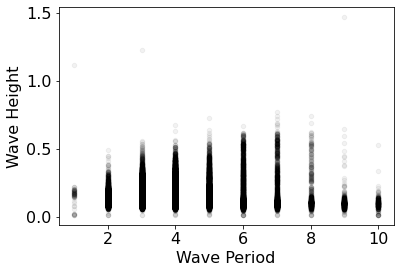

In [3]:
df = df[(df["Wave Period"] > 0) & (df["Wave Height"] > 0)]
df.plot.scatter(x="Wave Period", y="Wave Height", color="k", alpha=0.05)
# observation: non-linear relationship

In [4]:
beach_names = sorted(set(df["Beach Name"]))
beach_names

['63rd Street Beach',
 'Calumet Beach',
 'Montrose Beach',
 'Ohio Street Beach',
 'Osterman Beach',
 'Rainbow Beach']

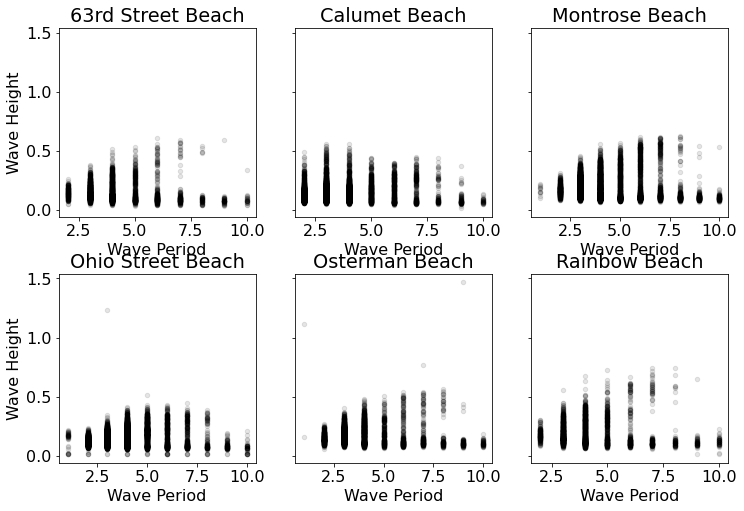

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)
plt.subplots_adjust(hspace=0.3)
axes = list(axes.reshape(-1))
for b in beach_names:
    ax = axes.pop(0)
    ax.set_title(b)
    beach_df = df[df["Beach Name"] == b]
    beach_df.plot.scatter(x="Wave Period", y="Wave Height", 
                          color="k", alpha=0.1, ax=ax)
# obversation: which beach (categorical feature) is important

# Four Models

1. wave period (linear)
2. wave period (polynomial)
3. beach
4. beach and wave period

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

## Model 1: Wave Period (Linear)

## Model 2: Wave Period (Polynomial)

## Model 3: Beach Name (Categorical)

## Model 4: Beach Name and Wave Period (Polynomial)